# 資優生策略

In [9]:
import talib

In [14]:
import pandas as pd

def mystrategy(data):
    
    股本 = data.get('股本合計', 1)
    price = data.get('收盤價', 120)
    當天股價 = price[:股本.index[-1]].iloc[-1]
    當天股本 = 股本.iloc[-1]
    市值 = 當天股本 * 當天股價 / 10 * 1000
   

    df1 = toSeasonal(data.get('投資活動之淨現金流入（流出）', 5))
    df2 = toSeasonal(data.get('營業活動之淨現金流入（流出）', 5))
    自由現金流 = (df1 + df2).iloc[-4:].mean()
    
    
    稅後淨利 = data.get('本期淨利（淨損）', 1)
    
    # 股東權益，有兩個名稱，有些公司叫做權益總計，有些叫做權益總額
    # 所以得把它們抓出來
    權益總計 = data.get('權益總計', 1)
    權益總額 = data.get('權益總額', 1)
    
    # 並且把它們合併起來
    權益總計.fillna(權益總額, inplace=True)
        
    股東權益報酬率 = 稅後淨利.iloc[-1] / 權益總計.iloc[-1]
    
    
    營業利益 = data.get('營業利益（損失）', 5)
    營業利益成長率 = (營業利益.iloc[-1] / 營業利益.iloc[-5] - 1) * 100
    
    
    當月營收 = data.get('當月營收', 4) * 1000
    當季營收 = 當月營收.iloc[-4:].sum()
    市值營收比 = 市值 / 當季營收
    
    
    condition1 = (市值 < 1e10)
    condition2 = 自由現金流 > 0
    condition3 = 股東權益報酬率 > 0
    condition4 = 營業利益成長率 > 0
    condition5 = 市值營收比 < 5
    
    select_stock = condition1 & condition2 & condition3 & condition4 & condition5
    
    return select_stock[select_stock]

In [3]:
import pandas as pd

def toSeasonal(df):
    season4 = df[df.index.month == 3]
    season1 = df[df.index.month == 5]
    season2 = df[df.index.month == 8]
    season3 = df[df.index.month == 11]

    season1.index = season1.index.year
    season2.index = season2.index.year
    season3.index = season3.index.year
    season4.index = season4.index.year - 1

    newseason1 = season1
    newseason2 = season2 - season1.reindex_like(season2)
    newseason3 = season3 - season2.reindex_like(season3)
    newseason4 = season4 - season3.reindex_like(season4)

    newseason1.index = pd.to_datetime(newseason1.index.astype(str) + '-05-15')
    newseason2.index = pd.to_datetime(newseason2.index.astype(str) + '-08-14')
    newseason3.index = pd.to_datetime(newseason3.index.astype(str) + '-11-14')
    newseason4.index = pd.to_datetime((newseason4.index + 1).astype(str) + '-03-31')

    return newseason1.append(newseason2).append(newseason3).append(newseason4).sort_index()

def mystrategy2(data):
    
    股本 = data.get('股本合計', 1)#.drop_duplicates(['stock_id', 'date'], keep='last')#.pivot(index='date', columns='stock_id')
    price = data.get('收盤價', 200)
    當天股價 = price[:股本.index[-1]].iloc[-1]
    當天股本 = 股本.iloc[-1]
    市值 = 當天股本 * 當天股價 / 10 * 1000
   

    df1 = toSeasonal(data.get('投資活動之淨現金流入（流出）', 5))
    df2 = toSeasonal(data.get('營業活動之淨現金流入（流出）', 5))
    自由現金流 = (df1 + df2).iloc[-4:].mean()
    
    
    稅後淨利 = data.get('本期淨利（淨損）', 1)
    
    # 股東權益，有兩個名稱，有些公司叫做權益總計，有些叫做權益總額
    # 所以得把它們抓出來
    權益總計 = data.get('權益總計', 1)
    權益總額 = data.get('權益總額', 1)
    
    # 並且把它們合併起來
    權益總計.fillna(權益總額, inplace=True)
        
    股東權益報酬率 = 稅後淨利.iloc[-1] / 權益總計.iloc[-1]
    
    
    營業利益 = data.get('營業利益（損失）', 5)
    營業利益成長率 = (營業利益.iloc[-1] / 營業利益.iloc[-5] - 1) * 100
    
    
    當月營收 = data.get('當月營收', 4) * 1000
    當季營收 = 當月營收.iloc[-4:].sum()
    市值營收比 = 市值 / 當季營收
    
    rsv = (price.iloc[-1] - price.iloc[-150:].min()) / (price.iloc[-150:].max() - price.iloc[-150:].min())
    
    
    condition1 = (市值 < 1e10)
    condition2 = 自由現金流 > 0
    condition3 = 股東權益報酬率 > 0
    condition4 = 營業利益成長率 > 0
    condition5 = 市值營收比 < 5
    condition6 = rsv > 0.5
    
    select_stock = condition1 & condition2 & condition3 & condition4 & condition5 & condition6
    
    return select_stock[select_stock]


In [4]:
import pandas as pd

def toSeasonal(df):
    season4 = df[df.index.month == 3]
    season1 = df[df.index.month == 5]
    season2 = df[df.index.month == 8]
    season3 = df[df.index.month == 11]

    season1.index = season1.index.year
    season2.index = season2.index.year
    season3.index = season3.index.year
    season4.index = season4.index.year - 1

    newseason1 = season1
    newseason2 = season2 - season1.reindex_like(season2)
    newseason3 = season3 - season2.reindex_like(season3)
    newseason4 = season4 - season3.reindex_like(season4)

    newseason1.index = pd.to_datetime(newseason1.index.astype(str) + '-05-15')
    newseason2.index = pd.to_datetime(newseason2.index.astype(str) + '-08-14')
    newseason3.index = pd.to_datetime(newseason3.index.astype(str) + '-11-14')
    newseason4.index = pd.to_datetime((newseason4.index + 1).astype(str) + '-03-31')

    return newseason1.append(newseason2).append(newseason3).append(newseason4).sort_index()

def gift_adj(data):
    
    股本 = data.get('股本合計', 1)#.drop_duplicates(['stock_id', 'date'], keep='last')#.pivot(index='date', columns='stock_id')
    price = data.get('收盤價', 200)
    當天股價 = price[:股本.index[-1]].iloc[-1]
    當天股本 = 股本.iloc[-1]
    市值 = 當天股本 * 當天股價 / 10 * 1000
   

    df1 = toSeasonal(data.get('投資活動之淨現金流入（流出）', 5))
    df2 = toSeasonal(data.get('營業活動之淨現金流入（流出）', 5))
    自由現金流 = (df1 + df2).iloc[-4:].mean()
    
    
    稅後淨利 = data.get('本期淨利（淨損）', 1)
    
    # 股東權益，有兩個名稱，有些公司叫做權益總計，有些叫做權益總額
    # 所以得把它們抓出來
    權益總計 = data.get('權益總計', 1)
    權益總額 = data.get('權益總額', 1)
    
    # 並且把它們合併起來
    權益總計.fillna(權益總額, inplace=True)
        
    股東權益報酬率 = 稅後淨利.iloc[-1] / 權益總計.iloc[-1]
    
    
    營業利益 = data.get('營業利益（損失）', 5)
    營業利益成長率 = (營業利益.iloc[-1] / 營業利益.iloc[-5] - 1) * 100
    
    
    當月營收 = data.get('當月營收', 4) * 1000
    當季營收 = 當月營收.iloc[-4:].sum()
    市值營收比 = 市值 / 當季營收
    
    rsv = (price.iloc[-1] - price.iloc[-150:].min()) / (price.iloc[-150:].max() - price.iloc[-150:].min())
    
    c1 = (市值 < 10000000000)
    c2 = 自由現金流 > 0
    c3 = 股東權益報酬率 > 0.15
    c4 = 營業利益成長率 > 0.1
    c5 = 市值營收比 < 5
    selects = c1 & c2 & c3 &c4 & c5
   
    
    return selects[selects]

## Penny stock

In [5]:
def talib_all_stock(data, date, function):
    close = data.get('收盤價', date)
    high = data.get('最高價', date)
    low = data.get('最低價', date)

    df_macd= pd.DataFrame()
    df_macdsignal= pd.DataFrame()
    df_macdhist= pd.DataFrame()
    for columns_name in close.columns.values.tolist():
        macd, macdsignal, macdhist = function(close[columns_name].ffill().values, fastperiod=12, slowperiod=26, signalperiod=9)
        df_macd[columns_name]=macd
        df_macdsignal[columns_name]=macdsignal
        df_macdhist[columns_name]=macdhist

    df_macd['date']=close.index.tolist()
    df_macdsignal['date']=close.index.tolist()
    df_macdhist['date']=close.index.tolist()

    df_macd      =df_macd.set_index('date')
    df_macdsignal=df_macdsignal.set_index('date')
    df_macdhist  =df_macdhist.set_index('date')
    return df_macd, df_macdsignal, df_macdhist
def strong_penny(data):
    
    ##################################################################
    # 基礎指標
    ##################################################################
    price = data.get('收盤價', 150)
    成交量 = data.get('成交股數', 150)
    
    ##################################################################
    # 基本面指標
    ##################################################################
    股本 = data.get('股本合計', 1)
    當天股價 = price[:股本.index[-1]].iloc[-1]
    當天股本 = 股本.iloc[-1]
    市值 = 當天股本 * 當天股價 / 10 * 1000
    單月營收月增率 = data.get('上月比較增減(%)', 1).iloc[-1]
    單月營收年增率 = data.get('前期比較增減(%)', 1).iloc[-1]
    累計營收年增率 = (data.get('當月累計營收', 1).iloc[-1] - data.get('去年累計營收', 1).iloc[-1])/(data.get('去年累計營收', 1).iloc[-1])
    季營收年增率 = ((data.get('當月營收', 3).sum() / data.get('去年當月營收', 3).sum()) - 1) * 100
    稅後淨利 = data.get('本期淨利（淨損）', 1)    
    # 股東權益，有兩個名稱，有些公司叫做權益總計，有些叫做權益總額
    # 所以得把它們抓出來
    權益總計 = data.get('權益總計', 1)
    權益總額 = data.get('權益總額', 1)    
    # 並且把它們合併起來
    權益總計.fillna(權益總額, inplace=True)      
    # 股東權益報酬率 越高越好
    股東權益報酬率 = 稅後淨利.iloc[-1] / 權益總計.iloc[-1]
    # 成交量, 單位: 股數
    最近三天平均成交量 = 成交量.tail(3).mean().iloc[-1]
    最近三天最大成交量 = 成交量.tail(3).max().iloc[-1]       
   
    ##################################################################
    # 技術面指標
    ##################################################################
    # 產生 MACD
    macd, macdsignal, macdhist = talib_all_stock(data, 150, talib.MACD)
   
    ##################################################################
    # 技術面選股條件
    ##################################################################
    # 專挑水餃股
    t0 = 當天股價 < 10
    # 多方續強：其正值大於或等於前一天的正值，多方力道持續增強中。
    t1 = (macdhist.iloc[-1] > 0) & (macdhist.iloc[-1] > macdhist.iloc[-2])
    # 空轉多：今天的值由負值轉為正值
    t2 = (macdhist.iloc[-1] > 0) & (macdhist.iloc[-2] < 0)
    # 空方轉弱：今天的值雖然還是負值但負值收斂，空方力道在轉弱中。
    t3 = ((macdhist.iloc[-1] < 0) 
        & (macdhist.iloc[-1] > macdhist.iloc[-2]) 
        & (macdhist.iloc[-2] > macdhist.iloc[-3]) 
        & (macdhist.iloc[-3] > macdhist.iloc[-4])
         )
    # 成交量
    t7 = (最近三天平均成交量 > 50*1000) | (最近三天最大成交量 > 50*1000)
    
    ##################################################################
    # 避開條件
    ##################################################################
    # 避開無法交易股票
    a0 = 成交量.iloc[-1] > 0

    ##################################################################
    # 基本面選股條件
    ##################################################################    
    b0 = (單月營收月增率 > 0) & (單月營收年增率 > 0) & (累計營收年增率 > -10)
    b1 = (季營收年增率 > 0)
    b2 = 股東權益報酬率 > 0.03
    
    condition = t0 & (t1 | t2 | t3) & (b0 | b1) & b2 & t7
    
    condition = condition & a0
    
    return condition[condition]

## financial dog

In [6]:
import pandas as pd

def toSeasonal(df):
    season4 = df[df.index.month == 3]
    season1 = df[df.index.month == 5]
    season2 = df[df.index.month == 8]
    season3 = df[df.index.month == 11]

    season1.index = season1.index.year
    season2.index = season2.index.year
    season3.index = season3.index.year
    season4.index = season4.index.year - 1

    newseason1 = season1
    newseason2 = season2 - season1.reindex_like(season2)
    newseason3 = season3 - season2.reindex_like(season3)
    newseason4 = season4 - season3.reindex_like(season4)

    newseason1.index = pd.to_datetime(newseason1.index.astype(str) + '-05-15')
    newseason2.index = pd.to_datetime(newseason2.index.astype(str) + '-08-14')
    newseason3.index = pd.to_datetime(newseason3.index.astype(str) + '-11-14')
    newseason4.index = pd.to_datetime((newseason4.index + 1).astype(str) + '-03-31')

    return newseason1.append(newseason2).append(newseason3).append(newseason4).sort_index()

def dog(data):
    # capital = data.get('股本合計',1)
# price = data.get('收盤價',100)
# # 先拿出計算市值需要用到的財務數據

    股本 = data.get('股本合計', 1)
    price = data.get('收盤價', 100)
    %matplotlib inline
    當月營收 = data.get('當月營收', 4) * 1000
    當季營收 = 當月營收.iloc[-4:].sum() # 取近4個月營收總和，當作一季的月營收（4也可以改變）

    # 將每季累計的財務數據，轉換成單季


    # 計算自由現金流 = 營業活動之淨現金流入 - 投資活動之淨現金流出
    投資現金流 = toSeasonal(data.get('投資活動之淨現金流入（流出）', 8))
    營業現金流 = toSeasonal(data.get('營業活動之淨現金流入（流出）', 8))
    自由現金流 = (投資現金流 + 營業現金流).iloc[-4:].sum()

    稅後淨利 = data.get('本期淨利（淨損）', 5)

    # 修正：因為有些股東權益的名稱叫作「權益總計」有些叫作「權益總額」，所以要先將這兩個dataframe合併起來喔！
    權益總計 = data.get('權益總計', 5)
    權益總額 = data.get('權益總額', 5)

    # 把它們合併起來（將「權益總計」為NaN的部分填上「權益總額」）
    權益總計.fillna(權益總額, inplace=True)

    股東權益報酬率 = 稅後淨利.iloc[-1] / 權益總計.iloc[-1]
    股東權益報酬率.describe()

    上季股東權益報酬率 = 稅後淨利.iloc[-5] / 權益總計.iloc[-5]
    上季股東權益報酬率.describe()

    營業利益 = data.get('營業利益（損失）', 5)
    營業利益成長率 = (營業利益.iloc[-1] / 營業利益.iloc[-5] - 1) * 100
    營業利益成長率.describe()

    # current
    流動資產 = data.get('流動資產合計',5)
    流動負債 = data.get('流動負債合計',5)
    current_ratio = 流動資產/流動負債
    # liability
    long_liability = data.get('非流動負債合計',5)
    long_liability

    #capital
    stocks = data.get('普通股股本',5)
    #inventory
    control_season = 2
    inventory = data.get('存貨合計',6)
    asset = data.get('資產總計',6)
    no_turnover = inventory/asset
    turnover_ratio = 1 - no_turnover
    turnover_growth_rate = (turnover_ratio.iloc[-control_season] /turnover_ratio.iloc[-control_season-4])
    turnover_growth_rate[0]

    condition1 = 當季營收 > 0
    condition2 = 自由現金流 >0
    condition3 = (營業現金流.iloc[-1]>0)
    condition4 = long_liability.iloc[-1] < long_liability.iloc[-5]
    condition5 = current_ratio.iloc[-1] >current_ratio.iloc[-5]
    condition6 = (stocks.iloc[-1] - stocks.iloc[-5])>0
    condition7 = 股東權益報酬率 > 上季股東權益報酬率
    condition8 = 營業利益成長率>0 #把毛益率改成營業利益率
  
    # condition10 = (price/10) > 3  

    # 將條件做交集（&）
    select_stock_first = condition1 & condition2 & condition3 & condition4 & condition5 

    select_stock_second = select_stock_first & condition6 &condition7&condition8 & condition9

    # 選出的股票
    select_stock = select_stock_second[select_stock_second]
    return select_stock



In [7]:
def music_strategy(data):
    
    # 計算 alpha beta (截點跟焦點)
    days = 800
    c = data.get('收盤價', days)
    
    # 請參考 https://zh.wikipedia.org/w/index.php?title=%E7%B7%9A%E6%80%A7%E5%9B%9E%E6%AD%B8
    # 中的單變量回歸

    y = c.iloc[-days:]
    x = pd.Series(list(range(days)), index=y.index)
    midy = y.mean(axis=0)
    midx = days/2

    beta = (y - midy).mul(x - midx, axis=0).sum()/((x-midx)**2).sum()
    alpha = midy - midx * beta


    # 計算中線跟標準差
    X = pd.DataFrame({k: x for k in beta.index})
    mid_line = ((X * beta + alpha))
    std = (y - mid_line).std()
    
    conditions = [
        (c.iloc[-1] < mid_line.iloc[-1] - 2*std),
        c.iloc[-1] > c.iloc[-20:].mean()
    ]
    
    selected_stock = sum(conditions) == len(conditions)
    
    return selected_stock[selected_stock]

In [8]:

# 計算自由現金流 = 營業活動之淨現金流入 - 投資活動之淨現金流出
投資現金流 = toSeasonal(data.get('投資活動之淨現金流入（流出）', 8))
營業現金流 = toSeasonal(data.get('營業活動之淨現金流入（流出）', 8))
自由現金流 = (投資現金流 + 營業現金流).iloc[-4:].sum()

稅後淨利 = data.get('本期淨利（淨損）', 5)

NameError: name 'data' is not defined

## Turning

In [12]:
import pandas as pd

def toSeasonal(df):
    season4 = df[df.index.month == 3]
    season1 = df[df.index.month == 5]
    season2 = df[df.index.month == 8]
    season3 = df[df.index.month == 11]

    season1.index = season1.index.year
    season2.index = season2.index.year
    season3.index = season3.index.year
    season4.index = season4.index.year - 1

    newseason1 = season1
    newseason2 = season2 - season1.reindex_like(season2)
    newseason3 = season3 - season2.reindex_like(season3)
    newseason4 = season4 - season3.reindex_like(season4)

    newseason1.index = pd.to_datetime(newseason1.index.astype(str) + '-05-15')
    newseason2.index = pd.to_datetime(newseason2.index.astype(str) + '-08-14')
    newseason3.index = pd.to_datetime(newseason3.index.astype(str) + '-11-14')
    newseason4.index = pd.to_datetime((newseason4.index + 1).astype(str) + '-03-31')

    return newseason1.append(newseason2).append(newseason3).append(newseason4).sort_index()

def turning(data):
    # capital = data.get('股本合計',1)
# price = data.get('收盤價',100)
# # 先拿出計算市值需要用到的財務數據

    股本 = data.get('股本合計', 1)
    price = data.get('收盤價', 100)
    %matplotlib inline
    當月營收 = data.get('當月營收', 4) * 1000
    當季營收 = 當月營收.iloc[-4:].sum() # 取近4個月營收總和，當作一季的月營收（4也可以改變）

    # 將每季累計的財務數據，轉換成單季


    # 計算自由現金流 = 營業活動之淨現金流入 - 投資活動之淨現金流出
    投資現金流 = toSeasonal(data.get('投資活動之淨現金流入（流出）', 5))
    營業現金流 = toSeasonal(data.get('營業活動之淨現金流入（流出）', 5))
    自由現金流 = (投資現金流 + 營業現金流).iloc[-4:].sum()

    稅後淨利 = data.get('本期淨利（淨損）', 5)
    給自由現金的稅後淨利 = data.get('本期淨利（淨損）', 4)
    # 修正：因為有些股東權益的名稱叫作「權益總計」有些叫作「權益總額」，所以要先將這兩個dataframe合併起來喔！
    權益總計 = data.get('權益總計', 5)
    權益總額 = data.get('權益總額', 5)

    # 把它們合併起來（將「權益總計」為NaN的部分填上「權益總額」）
    權益總計.fillna(權益總額, inplace=True)

    股東權益報酬率 = 稅後淨利.iloc[-1] / 權益總計.iloc[-1]
    股東權益報酬率.describe()

    上季股東權益報酬率 = 稅後淨利.iloc[-5] / 權益總計.iloc[-5]
    上季股東權益報酬率.describe()

    營業利益 = data.get('營業利益（損失）', 5)
    營業利益成長率 = (營業利益.iloc[-1] / 營業利益.iloc[-5] - 1) * 100
    營業利益成長率.describe()

    # current
    流動資產 = data.get('流動資產合計',5)
    流動負債 = data.get('流動負債合計',5)
    current_ratio = 流動資產/流動負債
    # liability
    long_liability = data.get('非流動負債合計',5)
    
    #銷貨
    銷貨收入 = data.get('銷貨收入',6)
    #capital
    stocks = data.get('普通股股本',5)
    #inventory
    control_season = 2
    inventory = data.get('存貨合計',6)
    asset = data.get('資產總計',6)
    no_turnover = inventory/asset
    turnover_ratio = 1 - no_turnover
    turnover_growth_rate = (turnover_ratio.iloc[-control_season] /turnover_ratio.iloc[-control_season-4])
    turnover_growth_rate[0]
    
    資產週轉率 = 銷貨收入/asset
    
    #淨值比
    流通股數= stocks / 10
    每股淨值= 權益總計 / 流通股數
    股價淨值比 = price.iloc[-1]/每股淨值.iloc[-1]  

    
    c1 = 當季營收 > 0
    c2 = 自由現金流 >0
    c3 = (營業現金流.iloc[-1]>0)
    c4 = long_liability.iloc[-1] < long_liability.iloc[-5]
    c5 = current_ratio.iloc[-1] >current_ratio.iloc[-5]
    c6 = (stocks.iloc[-1] - stocks.iloc[-5]) <= 0
    c7 = 股東權益報酬率 > 上季股東權益報酬率
    c8 = 營業利益成長率>0 #把毛益率改成營業利益率
    c9 = turnover_growth_rate >0
    c10 = 股價淨值比 > 1
    c11 = 稅後淨利.iloc[-1] > 0

        
    # 將條件做交集（&）
    select_stock = c1& c2 & c3& c4& c5& c6& c7& c8& c9 & c10 & c11

    # 選出的股票
    select_stock = select_stock[select_stock]
    return select_stock

目前擁有的財務數據：
存貨周轉成長率
流動比率
市值營收比
營業利益成長率
股東權益報酬率
稅後淨利
自由現金流

# 檢查報酬率

2017-03-11 - 2017-07-09 報酬率: 2.16 % nstock 125


/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


2017-07-09 - 2017-11-06 報酬率: 14.14 % nstock 83


/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


2017-11-06 - 2018-03-06 報酬率: 4.23 % nstock 82


/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


2018-03-06 - 2018-07-04 報酬率: 5.60 % nstock 82
2018-07-04 - 2018-11-01 報酬率: -13.20 % nstock 46
每次換手最大報酬 : 14.14 ％
每次換手最少報酬 : -13.20 ％


/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


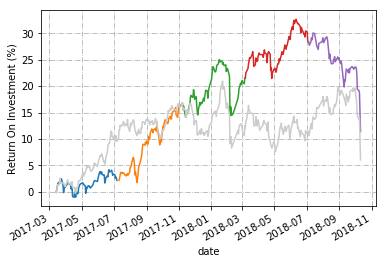

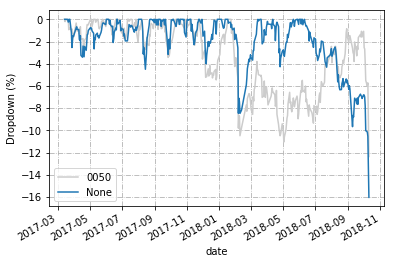

(2017-03-14    1.000000
 2017-03-15    1.003772
 2017-03-16    1.008054
 2017-03-17    1.015575
 2017-03-20    1.018773
 2017-03-21    1.016233
 2017-03-22    1.016698
 2017-03-23    1.022672
 2017-03-24    1.024332
 2017-03-27    1.011899
 2017-03-28    0.998330
 2017-03-29    1.004440
 2017-03-30    1.009252
 2017-03-31    1.008668
 2017-04-05    1.016410
 2017-04-06    1.017450
 2017-04-07    1.014867
 2017-04-10    1.015043
 2017-04-11    1.005807
 2017-04-12    1.004988
 2017-04-13    1.009191
 2017-04-14    0.991044
 2017-04-17    0.989403
 2017-04-18    0.999728
 2017-04-19    0.994279
 2017-04-20    0.989805
 2017-04-21    0.999259
 2017-04-24    0.995782
 2017-04-25    1.002904
 2017-04-26    1.010121
                 ...   
 2018-08-27    1.251906
 2018-08-28    1.252807
 2018-08-29    1.255406
 2018-08-30    1.250801
 2018-08-31    1.253993
 2018-09-03    1.242859
 2018-09-04    1.247311
 2018-09-05    1.243646
 2018-09-10    1.198448
 2018-09-11    1.211842
 2018-09-12    1

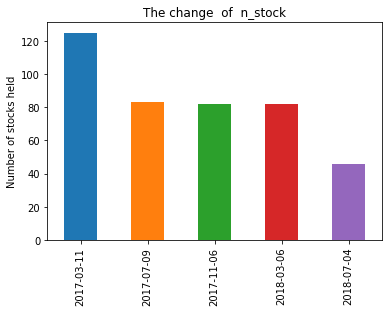

In [15]:
# 起手式
from finlab.backtest import backtest
from finlab.data import Data
import datetime
%matplotlib inline

# 回測
data = Data()
backtest(datetime.date(2017,3,11), datetime.date(2018,10,11), strategy=mystrategy, data=data,hold_days=120)

# 更新持股投資張數

In [16]:
from finlab.backtest import portfolio

data = Data()

# 利用 mystrategy 來產生股票清單 stocks
stocks = turning(data)
#這樣的投資分配很無聊，因為只是利用手頭上的資金盡可能分配到有的股票，就好像一艘船載滿了人，拼命要拿一個自己有的容器去裝。
#而裝不下的就把比較貴而不是低價值的股票給剔除，其實蠻無理的。
# 用portfolio來幫忙計算，給定 1,000,000 元，依照今天收盤價，股票張數要如何分配
total_invest_money = portfolio(stocks.index, 1000000, data)

# 印出股票資訊
print('---------------')
print('|  portfolio  |')
print('---------------')
print(stocks.index)
print('total cost')
print(total_invest_money)
print('----------selects-------------')
intselects = []
selects = []
print("-------for system input-----------")
for stock in list(stocks.index):
    intselects.append(int(stock))
print(intselects)
print('-------For Markoz potfolio input---------')
for stock in list(stocks.index):
    selects.append((stock))
print(selects)

estimate price according to 2018-11-19 00:00:00
initial number of stock 11
after considering fee 11
after considering 1000 share 11
---------------
|  portfolio  |
---------------
Index(['1410', '1615', '1783', '2337', '3019', '3090', '4968', '5534', '6277',
       '8481', '9937'],
      dtype='object', name='stock_id')
total cost
(stock_id
1410    3.0
1615    5.0
1783    4.0
2337    4.0
3019    1.0
3090    1.0
4968    2.0
5534    1.0
6277    1.0
8481    1.0
9937    2.0
Name: 2018-11-19 00:00:00, dtype: float64, 798450.0, stock_id
1410    23.35
1615    15.60
1783    20.85
2337    18.95
3019    63.50
3090    53.10
4968    42.45
5534    77.50
6277    81.80
8481    50.00
9937    40.20
Name: 2018-11-19 00:00:00, dtype: float64)
----------selects-------------
-------for system input-----------
[1410, 1615, 1783, 2337, 3019, 3090, 4968, 5534, 6277, 8481, 9937]
-------For Markoz potfolio input---------
['1410', '1615', '1783', '2337', '3019', '3090', '4968', '5534', '6277', '8481', '9937']
